In [32]:
import pandas as pd
import numpy as np

# Machine Learning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

# Read Data

In [ ]:
df_train = pd.read_csv("cmapss_train_df.csv")

In [ ]:
X_train = pd.read_csv("cmapss_train_data.csv")
y_train = pd.read_csv("cmapss_train_labels.csv")
X_test = pd.read_csv("cmapss_test_data.csv")
y_test = pd.read_csv("cmapss_test_labels.csv")

# Data Preprocessing

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Random Forest Regressor

In [24]:
rf_reg = RandomForestRegressor(n_estimators=500, min_samples_leaf=1, max_features='sqrt')
rf_reg.fit(X_train, y_train)

/Users/one/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_features='sqrt', n_estimators=500)

In [25]:
y_preds = rf_reg.predict(X_test)

In [26]:
rf_reg.score(X_test,y_test)

0.8161859077720749

In [28]:
mean_squared_error(y_test, y_preds, squared=False)

17.81636797778941

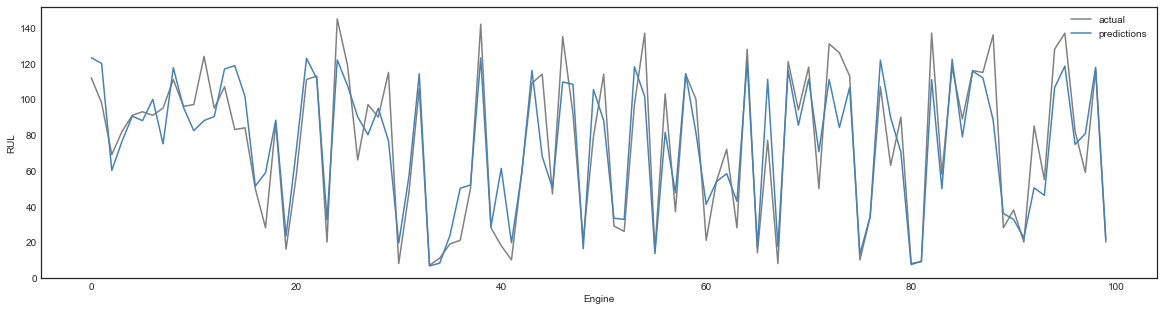

In [43]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = 20,5 

fig,ax = plt.subplots()

plt.ylabel('RUL')
plt.xlabel('Engine')

g = sns.lineplot(x = np.arange(0,len(df_train['engine'].unique())), y = y_test.to_numpy().ravel(),
                color='gray',
                label = 'actual',
                ax=ax)

f = sns.lineplot(x = np.arange(0,len(df_train['engine'].unique())),
                y=y_preds,
                color='steelblue',
                label = 'predictions',
                ax=ax)
ax.legend()

In [44]:
## Defining function to plot real data and the predicted one to make some comparison.

def plot_predActual(y_test, y_pred):

    indices = np.arange(len(y_pred))
    wth= 0.6
    plt.figure(figsize=(70,30))
    true_values = [int(x) for x in y_test.values]
    predicted_values = list(y_pred)

    plt.bar(indices, true_values, width=wth,color='b', label='True RUL')
    plt.bar([i for i in indices], predicted_values, width=0.5*wth, color='r', alpha=0.7, label='Predicted RUL')

    plt.legend(prop={'size': 40})
    plt.tick_params(labelsize=40)

    plt.show()

/var/folders/nm/wc9k6y9s09g8gmxp1y7whfdr0000gn/T/ipykernel_74768/1674339914.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true_values = [int(x) for x in y_test.values]


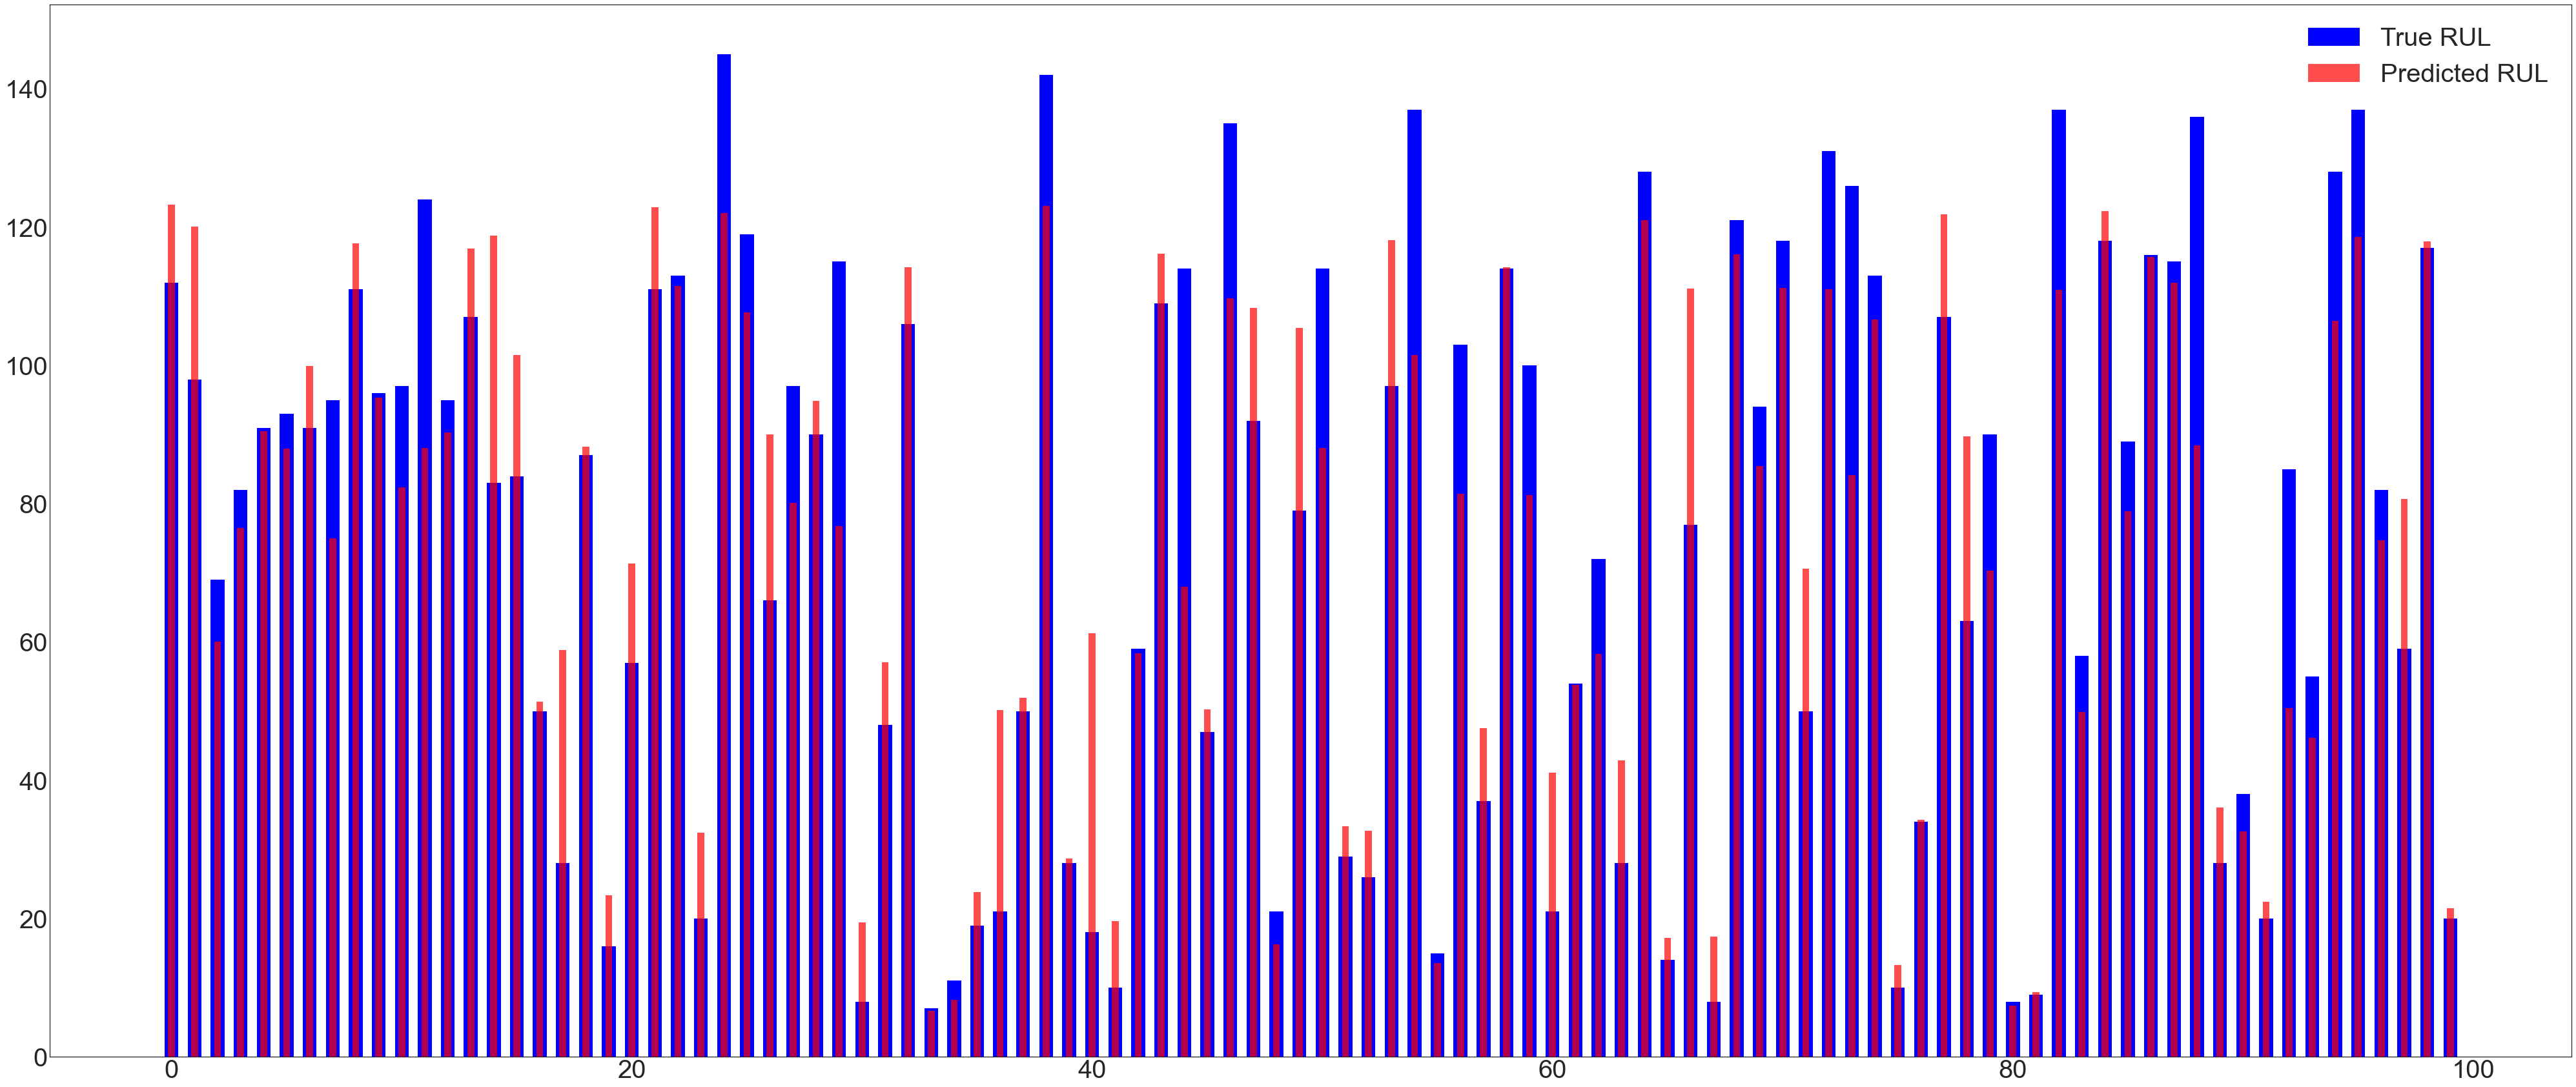

In [45]:
plot_predActual(y_test, y_preds)

### Save the model to disk

In [46]:
pickle.dump(rf_reg, open("baseline_rf_reg_v2.pkl", 'wb'))